In [1]:
# Import
import matplotlib.pyplot as plt

from CellPacking.tissuegeneration import sheet_init
from CellPacking.dynamics import Compression

from tyssue import Sheet
from tyssue import SheetGeometry
from tyssue.solvers import QSSolver
from tyssue.behaviors.event_manager import EventManager
from tyssue.dynamics import model_factory, effectors

from tyssue.draw import sheet_view

collision solver could not be imported You may need to install CGAL and re-install tyssue


# Apical sheet init

In [2]:
# Number of cells in x and y axis
nx = 20
ny = 20

try : 
    apical_sheet, geom = sheet_init(nx, ny)   
except IndexError :
    apical_sheet, geom = sheet_init(nx, ny)

CGAL-based mesh generation utilities not found, you may need to install CGAL and build from source
C++ extensions are not available for this version


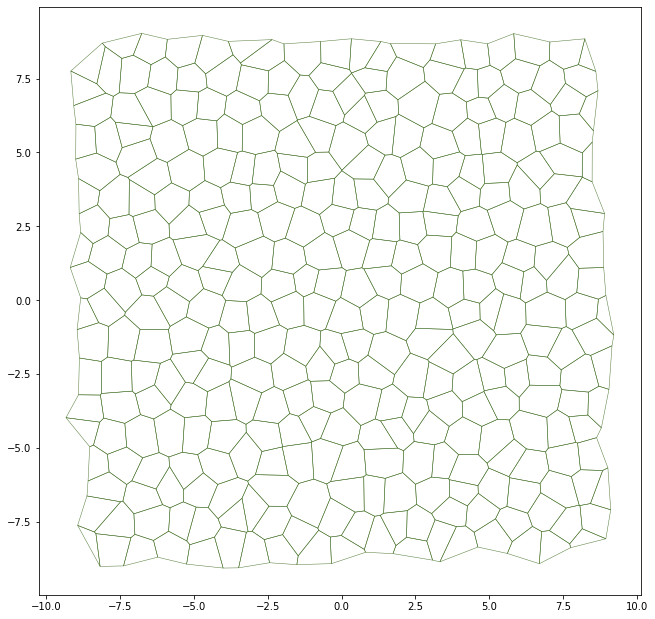

In [3]:
fig, ax = sheet_view(apical_sheet)
ax.set_aspect('equal')
fig.set_size_inches((12, 12))

# Basal sheet init 
=> Copy from the apical sheet

In [4]:
basal_sheet = apical_sheet.copy(deep_copy = True)

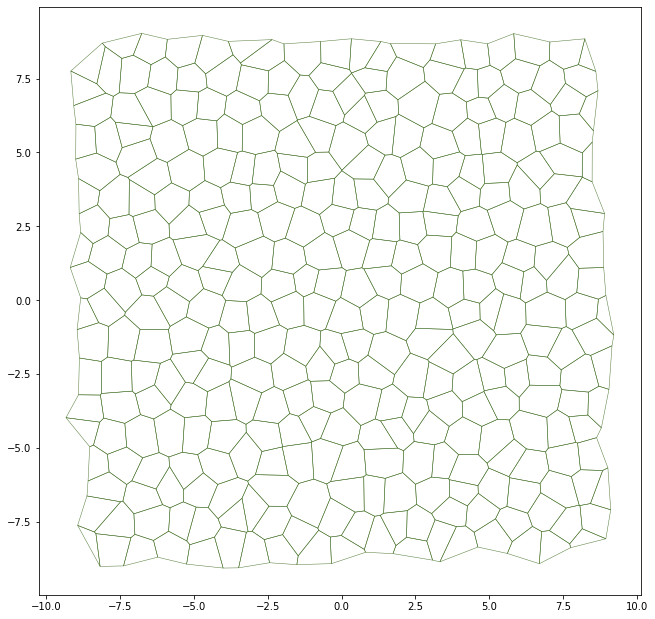

In [5]:
fig, ax = sheet_view(basal_sheet)
ax.set_aspect('equal')
fig.set_size_inches((12, 12))

# Model definition

In [6]:
manager = EventManager('face')
solver_qs = QSSolver(with_t1=True, with_t3=False, with_collisions=False)

model = model_factory(
    [
        Compression,
        effectors.FaceAreaElasticity,
    ], effectors.FaceAreaElasticity)

In [7]:
apical_sheet.update_specs({"vert":{"compression":0.},
                          "settings":{"dt":0.1, 
                                     "threshold_length" : 5e-2}})

apical_sheet.face_df['prefered_area'] = 1
apical_sheet.face_df['area_elasticity'] = 1.

      fun: 162.5
 hess_inv: <1944x1944 LbfgsInvHessProduct with dtype=float64>
      jac: array([nan,  0.,  0., ..., nan,  0.,  0.])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 4
      nit: 1
     njev: 4
   status: 0
  success: True
        x: array([nan, nan, nan, ..., nan, nan, nan])


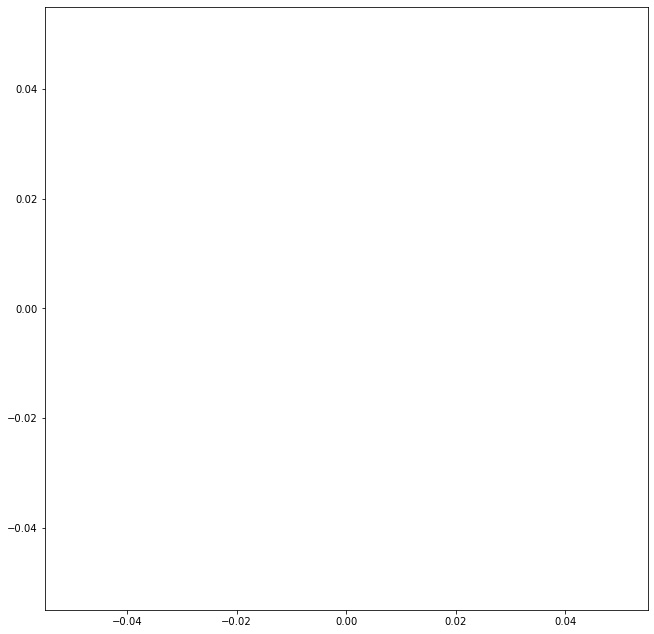

In [8]:
res = solver_qs.find_energy_min(apical_sheet, geom, model, periodic=False, options={"gtol": 1e-8}) 
print(res)

fig, ax = sheet_view(apical_sheet)
ax.set_aspect('equal')
fig.set_size_inches((12, 12))

# Compress sheet

In [9]:
apical_sheet.update_specs({"vert":{"compression":0.01},})

res = solver_qs.find_energy_min(apical_sheet, geom, model, periodic=False, options={"gtol": 1e-8}) 
print(res)

      fun: 162.5
 hess_inv: <1944x1944 LbfgsInvHessProduct with dtype=float64>
      jac: array([nan,  0.,  0., ..., nan,  0.,  0.])
  message: 'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 22
      nit: 0
     njev: 22
   status: 2
  success: False
        x: array([nan, nan, nan, ..., nan, nan, nan])


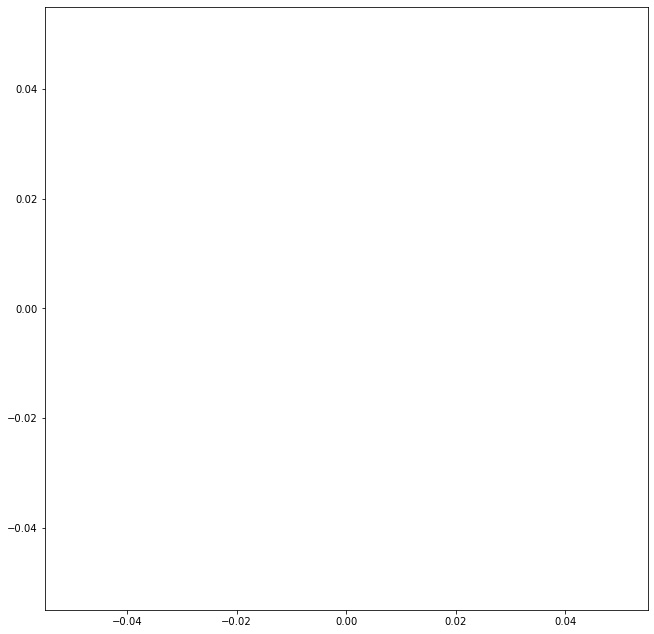

In [10]:
fig, ax = sheet_view(apical_sheet)
ax.set_aspect('equal')
fig.set_size_inches((12, 12))

In [11]:
from tyssue.draw.ipv_draw import sheet_view
import ipyvolume as ipv


apical_z = 2
basal_z = -2

apical_sheet.vert_df['z'] = apical_z
apical_sheet.edge_df['z'] = apical_z
apical_sheet.face_df['z'] = apical_z

basal_sheet.vert_df['z'] = basal_z
basal_sheet.edge_df['z'] = basal_z
basal_sheet.face_df['z'] = basal_z



# ipv.clear()
# fig, mesh = sheet_view(apical_sheet, coords = list('xyz'))
# fig, mesh = sheet_view(basal_sheet, coords = list('xyz'))
# fig